# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

# 파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=torch.randn(4, 3)
Y=torch.randn(4, 3)
row_cat = torch.cat([X, Y], dim = 0)
col_cat = torch.cat([X, Y], dim = 1)

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) #평균 0, 표준편차 1의 정규분포로부터 num_examples x len(w)의 난수 행렬 생성
    y = torch.matmul(X, w) + b # y = Xw + b
    y += torch.normal(0, 0.01, y.shape) # y의 shape과 동일한 형태로 정규분포로부터 난수 행렬 생성해서 y에 더해 noise 생성
    return X, y.reshape((-1, 1)) # y의 col 개수를 하나로

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5963, 0.3276]) 
label: tensor([6.7880])


In [ ]:
def data_iter(batch_size, features, labels): # synthetic data를 통해 생성한 데이터로부터 batch size만큼의 데이터를 읽어오는 함수
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices) #데이터를 특정 순서대로 읽어오는 것이 아닌 랜덤으로 읽어옴
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 2.0866,  0.6223],
        [-0.5917, -1.6311],
        [-0.7544, -1.2450],
        [-1.3705, -0.3097],
        [-0.8779,  0.3735],
        [ 0.5986,  0.4581],
        [-0.0752,  1.1862],
        [ 1.1242, -2.2676],
        [-0.0712,  1.4374],
        [ 0.5962,  0.9749],
        [ 0.2425, -1.9390],
        [ 1.4652, -0.7827],
        [ 0.6110,  0.3891],
        [-0.7896,  0.2553],
        [-0.8304, -1.3555],
        [-0.7889, -0.5249],
        [-0.9083,  1.3291],
        [ 1.2084, -0.8759],
        [ 0.0135, -0.9155],
        [ 0.6420,  0.5744]]) 
 tensor([[10.8295],
        [ 6.1709],
        [ 5.0835],
        [ 1.8681],
        [ 2.3079],
        [ 6.6056],
        [ 3.4977],
        [12.2717],
        [ 3.1407],
        [ 5.8323],
        [ 9.1443],
        [11.0754],
        [ 6.7560],
        [ 2.7433],
        [ 5.0650],
        [ 3.9212],
        [ 0.7781],
        [10.4337],
        [ 6.9108],
        [ 6.5599]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return ((y_hat - y.reshape(y_hat.shape))**2)/2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad(): #no_grad: tensor.backward()를 사용하지 않을 것이라는 것이 확실한 경우 유용한 메소드로, gradient calculation을 막아 메모리 소비를 줄여줌
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_() # 다음 루프에서 이전 루프에서 저장된 grad값이 간섭을 하게돼서 원하는 방향으로 학습이 되지 않은 것을 막기 위해 매번 0으로 초기화

In [ ]:
lr = 0.01
num_epochs = 50
net = linreg
loss = squared_loss

w0 = []; w1 = []; b1 = []; lossw0 = []; lossw1 =[]

for epoch in range(num_epochs): #backward propagation을 통한 optimization
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) #loss function from linear regression
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward() #backward()를 통한 partial derivate는 scalar function인 경우에만 구할 수 있기 때문에 sum()을 해준다고 함
        sgd([w, b], lr, batch_size) #w, b에 대해 sgd
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) #실제 feature와 label에 대해 얻은 training loss
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        lossw0.append(train_l[0].mean())
        lossw1.append(train_l[1].mean())

epoch 1, loss 2.781204
epoch 2, loss 0.374081
epoch 3, loss 0.050509
epoch 4, loss 0.006877
epoch 5, loss 0.000975
epoch 6, loss 0.000174
epoch 7, loss 0.000064
epoch 8, loss 0.000049
epoch 9, loss 0.000047
epoch 10, loss 0.000047
epoch 11, loss 0.000047
epoch 12, loss 0.000047
epoch 13, loss 0.000047
epoch 14, loss 0.000047
epoch 15, loss 0.000047
epoch 16, loss 0.000047
epoch 17, loss 0.000047
epoch 18, loss 0.000047
epoch 19, loss 0.000047
epoch 20, loss 0.000047
epoch 21, loss 0.000047
epoch 22, loss 0.000047
epoch 23, loss 0.000047
epoch 24, loss 0.000047
epoch 25, loss 0.000047
epoch 26, loss 0.000047
epoch 27, loss 0.000047
epoch 28, loss 0.000047
epoch 29, loss 0.000047
epoch 30, loss 0.000047
epoch 31, loss 0.000047
epoch 32, loss 0.000047
epoch 33, loss 0.000047
epoch 34, loss 0.000047
epoch 35, loss 0.000047
epoch 36, loss 0.000047
epoch 37, loss 0.000047
epoch 38, loss 0.000047
epoch 39, loss 0.000047
epoch 40, loss 0.000047
epoch 41, loss 0.000047
epoch 42, loss 0.000047
e

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

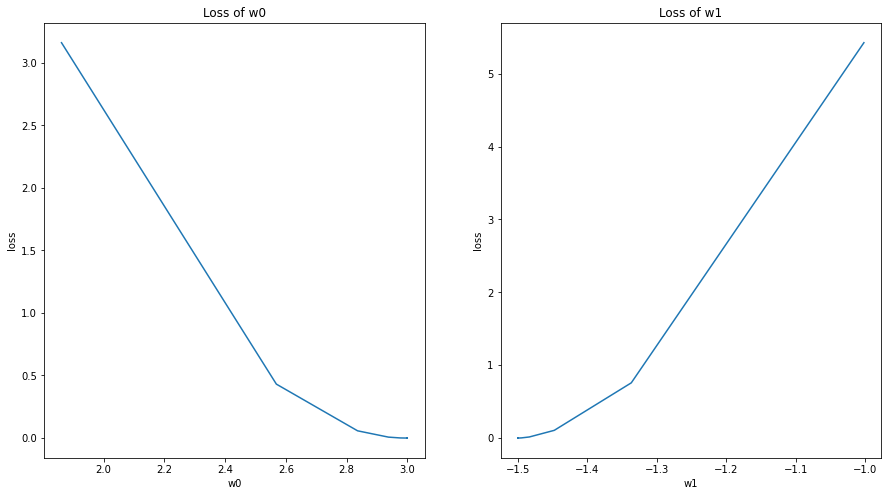

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.plot(w0, lossw0)
plt.title("Loss of w0")
plt.xlabel("w0")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(w1, lossw1)
plt.title("Loss of w1")
plt.xlabel("w1")
plt.ylabel("loss")

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter)) #iter을 통해 반복가능한 개체 data_iter에서 이터레이터를 반환하고 next를 통해 이를 호출 next 한 번 했으니까 첫번째 값만 반환한 결과

[tensor([[-1.1611, -1.5172],
         [-1.1703, -1.2070],
         [-1.4465, -0.3997],
         [-1.1921,  0.1452],
         [-0.9620,  0.0122],
         [ 0.4116, -0.7106],
         [-0.5884,  0.3174],
         [-0.0532,  0.1766],
         [ 0.3755, -0.3270],
         [ 0.1706,  0.1344],
         [-0.8241, -0.0520],
         [-0.1520, -0.1347],
         [-1.3852, -1.1862],
         [ 0.6591, -0.2923],
         [ 0.0604, -1.1401],
         [-1.3317,  1.1370],
         [-0.1228, -0.2558],
         [ 1.0438,  0.9313],
         [ 1.2760,  1.9585],
         [ 0.0432, -0.3169]]), tensor([[ 4.2826],
         [ 3.8184],
         [ 1.7740],
         [ 1.7050],
         [ 2.5950],
         [ 7.7739],
         [ 3.2533],
         [ 5.0787],
         [ 7.1093],
         [ 5.8162],
         [ 3.1146],
         [ 5.2321],
         [ 3.1426],
         [ 7.9232],
         [ 7.3921],
         [-0.2140],
         [ 5.5090],
         [ 7.2302],
         [ 6.3836],
         [ 6.1099]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) #single layer의 linear regression이기 때문에 원래는 nn.Sequential 불필요

In [ ]:
net[0].weight.data.normal_(0, 0.01) #initialize the weight from random samples from normal dist of mean 0 and sd 0.01
net[0].bias.data.fill_(0) #bias parameter initialized as zero

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step() #각 backpropagation 단계에서 수집된 gradient로 parameter를 조정
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000230
epoch 2, loss 0.000103
epoch 3, loss 0.000104


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0005, -0.0009])
error in estimating b: tensor([-0.0001])
